# 3. Self-consistent field 

## Exercises

In [1]:
%reset -f
%matplotlib inline
from pylab import *

#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34; q=1.602e-19; I0=q*q/hbar;

#Parameters
U0=0.25; kT=0.025; mu=0; ep=0.2;
g1=0.005; g2=0.005; g=g1+g2;
alphag=1; alphad=0.5;

#Energy grid
NE=501; E=linspace(-1,1,NE); dE=E[1]-E[0];
D=(g/(2*pi))/((E**2)+((g/2)**2)); #Lorentzian Density of states per eV
D=D/(dE*sum(D)); #Normalizing to one

#Bias
IV=101; VV=linspace(0,1,IV);

#Initializing arrays
Nup=zeros((IV)); Ndn=zeros((IV)); Iup=zeros((IV)); Idn=zeros((IV)); 

for iV in range(0,IV):
    Vg=0; Vd=VV[iV];
    mu1=mu; mu2=mu1-Vd; UL=-(alphag*Vg)-(alphad*Vd);
    Uup=0; Udn=0.1; #Unrestricted self-consistent field
    dU=1;
    
    while dU>0.001:
        f1up=1/(1+exp((E+ep+UL+Uup-mu1)/kT)); 
        f2up=1/(1+exp((E+ep+UL+Uup-mu2)/kT));
        Nup[iV]=dE*sum(D*((f1up*g1)+(f2up*g2))/(g1+g2));
        f1dn=1/(1+exp((E+ep+UL+Udn-mu1)/kT));
        f2dn=1/(1+exp((E+ep+UL+Udn-mu2)/kT));
        Ndn[iV]=dE*sum(D*((f1dn*g1)+(f2dn*g2))/(g1+g2));
        Udnnew=2*U0*(Nup[iV]-0.5); Udn=Udn+0.1*(Udnnew-Udn);
        Uupnew=2*U0*(Ndn[iV]-0.5); Uup=Uup+0.1*(Uupnew-Uup);
        dU=abs(Uup-Uupnew)+abs(Udn-Udnnew);
        
    Iup[iV]=dE*I0*(sum(D*(f1up-f2up)))*(g1*g2/g);
    Idn[iV]=dE*I0*(sum(D*(f1dn-f2dn)))*(g1*g2/g);

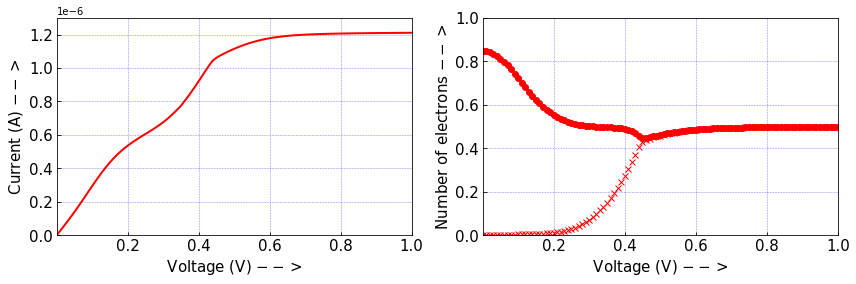

In [2]:
figure(figsize=(14,4))
subplot(1,2,1)
plot(VV,Iup+Idn,'r',lw=2)
xlabel(' Voltage (V) $-->$ ',fontsize=15)
ylabel(' Current (A) $-->$ ',fontsize=15)
xlim(0,1)
ylim(0,1.3e-6)
ticklabel_format(style='sci',axis='y',scilimits=(0,0))
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0.2,1.2,0.2),fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

subplot(1,2,2)
plot(VV,Nup,'ro',lw=2)
plot(VV,Ndn,'rx',lw=2)
xlabel(' Voltage (V) $-->$ ',fontsize=15)
ylabel(' Number of electrons $-->$ ',fontsize=15)
xlim(0,1)
ylim(0,1)
ticklabel_format(style='sci',axis='y',scilimits=(0,0))
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0.2,1.2,0.2),fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)